# MVRegFus: Stitching

Notebook to test stitching / tiling of many tif stacks.

- Create test data
- Write to tifs
- Run registration and fusion

In [1]:
%matplotlib widget
import mvregfus
from mvregfus import multiview

import numpy as np
from scipy import ndimage
from dask import array as da
import tifffile

In [9]:
im = np.random.randint(0,5,(10,11))
im[tuple(np.where(im==3))]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [2]:
# for i in range(8):
#     im = tifffile.imread('/home/malbert/Downloads/stitching/emb2/WT_emb2_20X_part1_p2_subset.czi - WT_emb2_20X_part1_p2_subset.czi #%s.tif' %(i+1))
#     for t in range(len(im)):
#         print(i, t)
#         tifffile.imwrite('/home/malbert/Downloads/stitching/highmag/highmag_t%03d_ch00_%s.tif' %(t, i+1), im[t,:,0])

In [3]:
# for i in range(8):
#     im = tifffile.imread('/home/malbert/Downloads/stitching/emb2/WT_emb2_20X_part1_p2_subset.czi - WT_emb2_20X_part1_p2_subset.czi #%s.tif' %(i+1))
#     for t in range(len(im)):
#         print(i, t)
#         tifffile.imwrite('/home/malbert/Downloads/stitching/highmag/highmag_max_t%03d_ch00_%s.tif' %(t, i+1), im[t,:,0].max(-3))

In [5]:
'%(d)03d, %(e)03d' %{'d':2}

KeyError: 'e'

In [2]:
%%capture

from mvregfus import mv_graph, io_utils, mv_utils

import importlib
mv_graph = importlib.reload(mv_graph)
io_utils = importlib.reload(io_utils)
mv_utils = importlib.reload(mv_utils)
multiview = importlib.reload(multiview)

graph = {}
for t in range(101):

    px_overlap_between_stacks = 30

    # specify input views
    view_dict = dict()
    # for iind, ind in enumerate(np.ndindex(x.numblocks)):
    # fp = '/home/malbert/Downloads/stitching/emb_9/tif_planes/f_%(tile)01d_t%(t)03d_c%(ch)03d.tif'
    fp = '/home/malbert/projects/stitching/data/2d_1/tif_planes/tile_%(tile)01d__t%(t)03d_%(ch)s.tif'

    tiles = range(1, 9)

    # def tile_index_to_gridpos(iind):
    #     if iind <=2: return ((0, iind))
    #     elif iind <=5: return ((1, 5-iind))
    #     else: return ((2, iind-6))
    
    def tile_index_to_gridpos(iind):
        if iind <=3: return ((0, iind))
        else: return ((1, 3 - (iind - 4)))

    xy_shape = None
    for iind, tile in enumerate(tiles):
        view_dict[iind] = dict()
        view_dict[iind]['view'] = iind # view identifier
        view_dict[iind]['filename'] = fp %{'tile': tile, 't':t+1, 'ch':"c%(ch)03d"}
        if xy_shape is None:
            xy_shape = np.array(tifffile.imread(fp %{'tile': tile, 't':t+1, 'ch':"c001"}).shape)
            xy_shape = np.array([10]+list(xy_shape))
            # xy_shape = np.array(io_utils.)
        view_dict[iind]['spacing'] = np.ones(3)
        view_dict[iind]['rotation'] = 0 # all tiles have same rotation angle
        view_dict[iind]['shape'] = xy_shape

        view_dict[iind]['origin'] = np.array((0,)+tile_index_to_gridpos(iind)) * \
                                    np.array((0,) + tuple(xy_shape[1:])) \
                                    - 2 * np.array((0,)+tile_index_to_gridpos(iind)) * px_overlap_between_stacks

    pairs = [(ii,ij) for ii, i in enumerate(tiles)
             for ij, j in enumerate(tiles)
             if np.sum(np.abs(np.array(tile_index_to_gridpos(ii))-np.array(tile_index_to_gridpos(ij)))) == 1 and ii<ij]

    # pairs = pairs[:1]

    # build dask graph
    graph.update(
        mvregfus.mv_graph.build_multiview_graph(
            out_dir='/home/malbert/projects/stitching/data/3d_mvregfus_3',
            filepath=None,
            channels=[1, 2],
            reg_channel=1,
            perform_chromatic_correction=False,
            mv_registration_bin_factors=[1,1,1],
            mv_final_spacing=[1,1,1],
            pairs=pairs,
            view_dict=view_dict,
            fusion_method='weighted_average',
            fusion_weights='blending',
        #     fusion_weights='dct',
            elastix_dir='/home/malbert/software/elastix',
            pairwise_registration_mode=None, # 0: translation registration using elastix
            final_volume_mode='union',
            debug_pairwise_registration=True,
            background_level=0,
            sample=t,
            time_alignment=False,
            time_alignment_ref_view=0,
        )
    )

# compute dask graph
keys = [k for k in graph.keys() if k.startswith('mv_transf')]
# o = io_utils.get(graph, keys, local=True)
# graph

In [ ]:
from dask.diagnostics import ProgressBar
# with ProgressBar():
o = io_utils.get(graph, keys, local=True)

prepending dummy z dimension
prepending dummy z dimension
DECORATOR local... register_linear_elastix
producing /home/malbert/projects/stitching/data/3d_mvregfus_3/mv_params_000_000_vfix000_vmov001.prealignment.h5
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
prepending dummy z dimension
DECORATOR local... register_linear_elastix
producing /home/malbert/projects/stitching/data/3d_mvregfus_3/mv_params_000_000_vfix001_vmov002.prealignment.h5
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
prepending dummy z dimension
DECORATOR local... register_linear_elastix
producing /home/malbert/projects/stitching/data/3d_mvregfus_3/mv_params_000_000_vfix001_vmov006.prealignment.h5
compute clahe with kernel size 10
compute clahe with kernel size 10
DECORATOR local... calc_stack_properties_from_views_and_params
prepending dummy z dimensi

In [ ]:
a=

In [ ]:
rm -r /home/malbert/Downloads/stitching/mvregfus1_max

In [ ]:
ls /home/malbert/Downloads/stitching/mvregfus1

In [ ]:
# from mvregfus import mv_graph, io_utils, mv_utils

# import importlib
# mv_graph = importlib.reload(mv_graph)
# io_utils = importlib.reload(io_utils)
# mv_utils = importlib.reload(mv_utils)
# multiview = importlib.reload(multiview)

# n_tiles_per_dim = 5
# px_overlap_between_stacks = 30

# # specify input views
# view_dict = dict()
# # for iind, ind in enumerate(np.ndindex(x.numblocks)):
# fp = '/home/malbert/Downloads/stitching/emb_9/tif_planes/f_%(tile)01d_t%(t)03d_c%(ch)03d.tif'

# tiles = range(1, 9)

# def tile_index_to_gridpos(iind):
#     if iind <=3: return ((0, iind))
#     else: return ((1, 7-iind))

# xy_shape = None
# for iind, tile in enumerate(tiles):
#     view_dict[iind] = dict()
#     view_dict[iind]['view'] = iind # view identifier
#     view_dict[iind]['filename'] = fp %{'tile': tile, 't':1, 'ch':1}
#     if xy_shape is None:
#         xy_shape = np.array(tifffile.imread(view_dict[iind]['filename']).shape)
#         # xy_shape = np.array(io_utils.)
#     view_dict[iind]['spacing'] = np.ones(3)
#     view_dict[iind]['rotation'] = 0 # all tiles have same rotation angle
#     view_dict[iind]['shape'] = np.array((10,) + tuple(xy_shape))
    
#     view_dict[iind]['origin'] = np.array((0,)+tile_index_to_gridpos(iind)) * \
#                                 np.array((0,) + tuple(xy_shape)) \
#                                 - 2 * np.array((0,)+tile_index_to_gridpos(iind)) * px_overlap_between_stacks

# pairs = [(ii,ij) for ii, i in enumerate(tiles)
#          for ij, j in enumerate(tiles)
#          if np.sum(np.abs(np.array(tile_index_to_gridpos(ii))-np.array(tile_index_to_gridpos(ij)))) == 1]

# # pairs = pairs[:1]

# # build dask graph
# graph = mvregfus.mv_graph.build_multiview_graph(
#     out_dir='/home/malbert/Downloads/stitching/mvregfus1',
#     filepath=None,
#     channels=[0],
#     mv_registration_bin_factors=[1,1,1],
#     mv_final_spacing=[1,1,1],
#     pairs=pairs,
#     view_dict=view_dict,
#     fusion_method='weighted_average',
#     fusion_weights='blending',
# #     fusion_weights='dct',
#     elastix_dir='/home/malbert/software/elastix',
#     pairwise_registration_mode=0, # 0: translation registration using elastix
#     final_volume_mode='union',
#     debug_pairwise_registration=True,
#     background_level=0,
# )

# # compute dask graph
# o = io_utils.get(graph, mv_graph.multiview_fused_label %(0, 0, 0), local=True)
# # graph

In [ ]:
res = o.compute()#scheduler='single-threaded')

In [ ]:
%debug

In [4]:
a=

SyntaxError: invalid syntax (62411553.py, line 1)

In [ ]:
h5py.File('

In [ ]:
tifffile.imshow(res)

In [ ]:
1

(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f6bfcba50d0>)

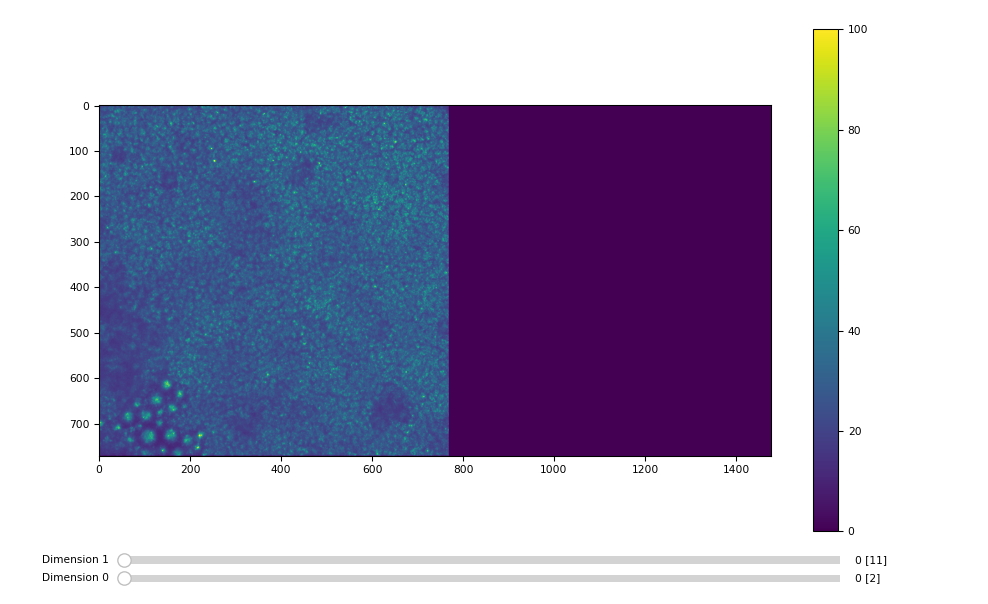

In [7]:
import h5py
h5py.File('/home/malbert/projects/stitching/data/3d_mvregfus_2/mv_params_000_000_vfix000_vmov001.prealignment.h5')['prealignment'][()]
fns_tview = ['/home/malbert/projects/stitching/data/3d_mvregfus_2/mv_transf_view_000_000_v%03d_c02.image.ims' %v for v in range(2)]

ims = np.array([h5py.File(fn_tview, 'r')['Data'][()] for fn_tview in fns_tview])
tifffile.imshow(ims, vmin=0, vmax=100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [05:05<00:00,  3.02s/it]


(<Figure size 988.8x604.8 with 4 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x7f9ab18f1820>)

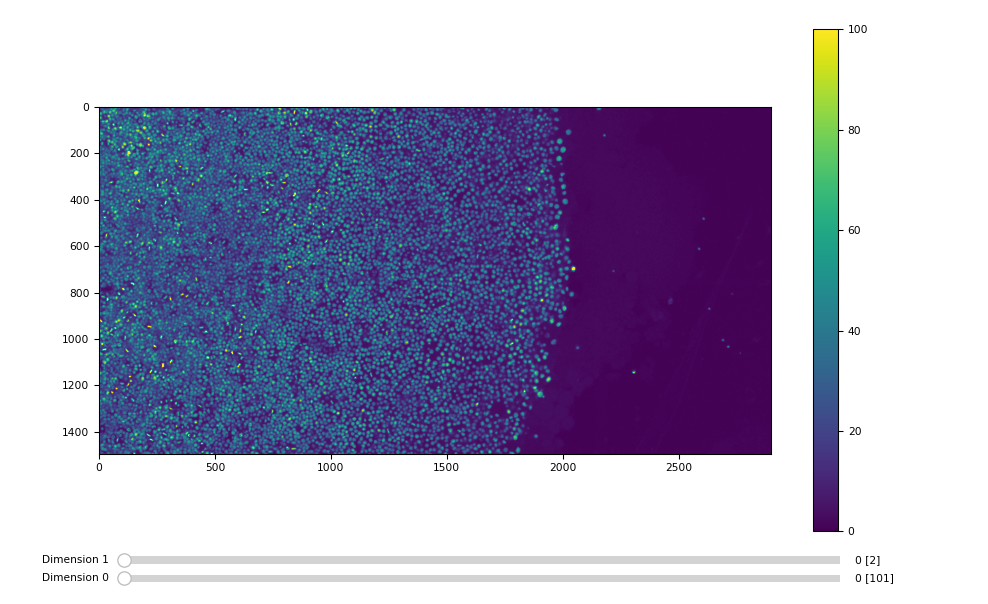

In [7]:
imt = []
from tqdm import tqdm
import h5py
min_shape = np.array([50000, 50000])
chs = [1, 2]
for t in tqdm(range(101)):
    tim = []
    for ch in chs:
    
        fns_tview = ['/home/malbert/projects/stitching/data/3d_mvregfus_parallel/mv_transf_view_000_%03d_v%03d_c%02d.image.ims' %(t, v, ch) for v in range(8)]
        ims = np.array([h5py.File(fn_tview, 'r')['Data'][()].max(-3) for fn_tview in fns_tview])

        w = np.sum(ims!=0, 0)
        w[w==0]=1
        im = np.sum(ims, 0)/w
        tim.append(im)
        
    imt.append(np.array(tim))
    min_shape = np.min([min_shape, im.shape],0)
    
imt = np.array([i[:, :min_shape[0], :min_shape[1]] for i in imt])

tifffile.imshow(imt, vmin=0, vmax=100)

In [8]:
tifffile.imsave("/home/malbert/projects/stitching/WT_emb2_20X_part1_Scene-2-TR3_mvregfus_ch_1_2.tif", imt)

/tmp/ipykernel_124126/2477530512.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave("/home/malbert/projects/stitching/WT_emb2_20X_part1_Scene-2-TR3_mvregfus_ch_1_2.tif", imt)


In [ ]:
rm -r /home/malbert/Downloads/stitching/mvregfus1

In [ ]:
# load result from file
fused_result = io_utils.process_input_element(os.path.join('data/stitch', mv_graph.multiview_fused_label %(0, 0, 0)))

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(fused_result.max(-3), vmin=0, vmax=10000)
